<a href="https://colab.research.google.com/github/ramdarsh/Deep_Learning/blob/main/MNIST_digit_classification_using_deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Load the mnist data from keras.datsets

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
type(x_train)

numpy.ndarray

In [4]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [5]:
print(x_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [6]:
print(x_train[10].shape)

(28, 28)


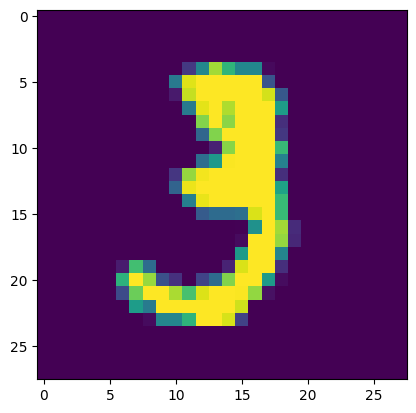

3


In [7]:
#displaying the images
plt.imshow(x_train[10])
plt.show()
#in y label
print(y_train[10])

In [8]:
cv2_imshow(x_train[10])

image labels

In [9]:
print(y_train.shape,y_test.shape)

(60000,) (10000,)


In [10]:
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


Use these labels as such or we can apply ohe

All the images have same dimension in this dataset, if not, we have to resize all the images to a common dimension

In [11]:
#scaling the values

x_train = x_train/255
x_test = x_test/255

In [12]:
print(x_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the neural network

simple cnn method

In [13]:
# setting up layers
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

In [14]:
#compiling

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
#training the NEural network

model.fit(x_train,y_train,validation_split=0.1,epochs=10)

Epoch 1/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3208 - accuracy: 0.9067 - val_loss: 0.1455 - val_accuracy: 0.9587
Epoch 2/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.1472 - accuracy: 0.9561 - val_loss: 0.1169 - val_accuracy: 0.9665
Epoch 3/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.1092 - accuracy: 0.9665 - val_loss: 0.1058 - val_accuracy: 0.9690
Epoch 4/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0877 - accuracy: 0.9732 - val_loss: 0.1050 - val_accuracy: 0.9710
Epoch 5/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0731 - accuracy: 0.9773 - val_loss: 0.1048 - val_accuracy: 0.9725
Epoch 6/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.0620 - accuracy: 0.9803 - val_loss: 0.1036 - val_accuracy: 0.9700
Epoch 7/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0534 - accuracy: 0.9827 - val_loss: 0.0972 - val_accuracy:

Training data accuracy=98.9%

In [16]:
#accuracy test data
loss,accuracy = model.evaluate(x_test,y_test)
print(accuracy)

313/313 [==============================] - 0s 2ms/step - loss: 0.1035 - accuracy: 0.9726
0.972599983215332


Test data accuracy=97.5%

In [17]:
print(x_test.shape)

(10000, 28, 28)


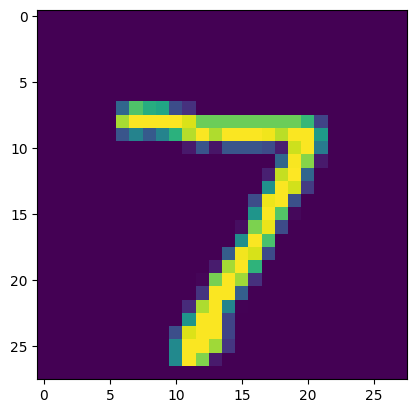

In [18]:
plt.imshow(x_test[0])
plt.show()

In [19]:
print(y_test[0])

7


In [20]:
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 1ms/step


In [21]:
print(y_pred.shape)

(10000, 10)


In [22]:
print(y_pred[0])

[4.7229347e-03 1.2922134e-04 9.4014633e-01 9.9964279e-01 3.1401115e-08
 2.3012357e-02 2.2595976e-09 9.9999696e-01 3.8265127e-01 3.9356381e-02]


model.predict() gives the prediction probability of each class for that data point

In [23]:
#converting the pred probability to class label for all test label
label_first=np.argmax(y_pred[0])
label_first

7

In [24]:
y_pred_label = [np.argmax(i) for i in y_pred]
print(y_pred_label)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 8, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 3, 3, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 3, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

y_test --> True labels

y_pred --> predicted labels

Confusion matrix

In [25]:
conf_mat = confusion_matrix(y_test,y_pred_label)

In [26]:
conf_mat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    2,    3,    1,    3,    4,    0,    1,    1],
       [   0, 1122,    4,    2,    0,    0,    1,    1,    5,    0],
       [   3,    0, 1003,   11,    2,    1,    2,    4,    5,    1],
       [   0,    0,    2,  992,    0,    8,    0,    3,    5,    0],
       [   0,    0,    6,    0,  950,    2,    6,    2,    4,   12],
       [   3,    0,    0,    9,    0,  870,    4,    0,    5,    1],
       [   4,    2,    1,    0,    5,    8,  934,    0,    4,    0],
       [   1,    1,   18,   11,    0,    1,    0,  988,    1,    7],
       [   2,    0,    5,   11,    0,    3,    1,    3,  947,    2],
       [   2,    3,    2,   23,    6,    7,    0,    5,    7,  954]],
      dtype=int32)>

Text(0.5, 47.7222222222222, 'predicted label')

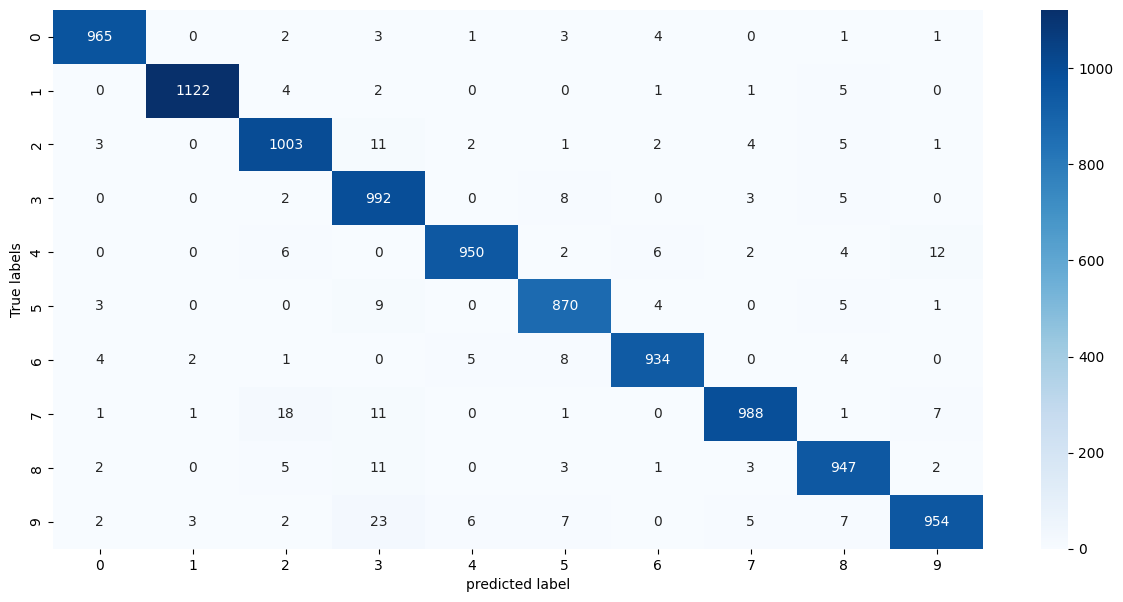

In [27]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True,fmt='d',cmap='Blues')
plt.ylabel('True labels')
plt.xlabel('predicted label')

Predictive system

In [28]:
input_image_path ='/content/MNIST_digit.png'

input_image = cv2.imread(input_image_path)

In [29]:
type(input_image)

numpy.ndarray

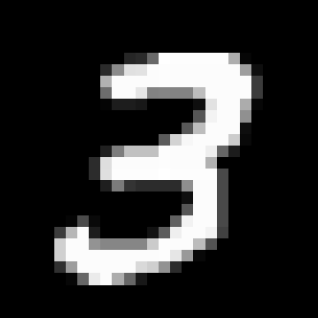

In [30]:
cv2_imshow(input_image)

In [31]:
input_image.shape

(318, 318, 3)

In [32]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [33]:
grayscale.shape

(318, 318)

In [34]:
input_image_resize = cv2.resize(grayscale,(28,28))

In [35]:
input_image_resize.shape

(28, 28)

In [36]:
cv2_imshow(input_image_resize)

In [37]:
input_image_resize = input_image_resize/255

In [38]:
image_reshaped = np.reshape(input_image_resize,[1,28,28])

In [39]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 19ms/step
[[2.5486255e-05 4.2800838e-03 6.7784435e-01 1.0000000e+00 5.2461806e-13
  5.0596839e-01 5.3092211e-11 3.1435467e-02 1.5193012e-01 4.1589689e-01]]


In [40]:
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

3


Path of the image to be predicted: /content/sample_image.png


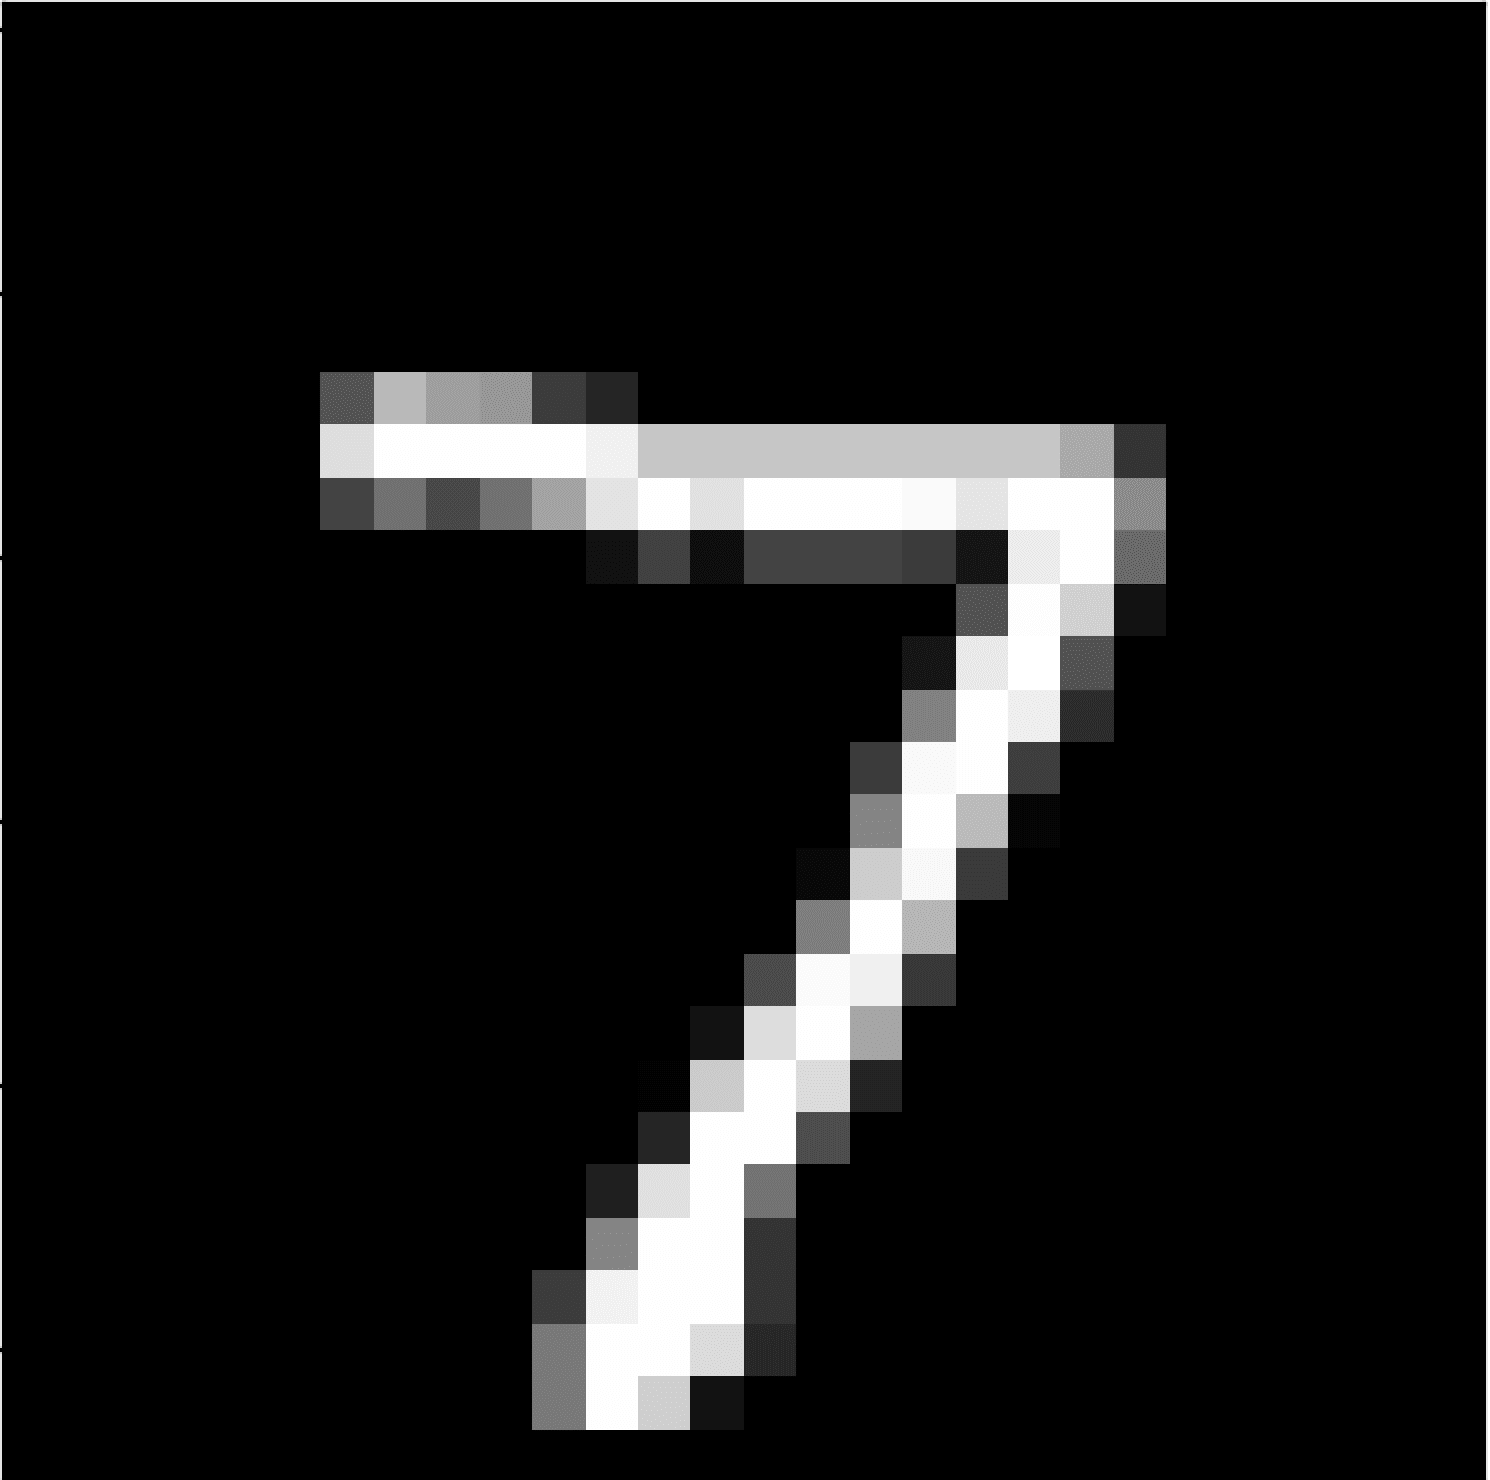

1/1 [==============================] - 0s 38ms/step
the handwritten digit is recognised as 7


In [42]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale,(28,28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize,[1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('the handwritten digit is recognised as',input_pred_label)